<center><h2>Prediction using Decision Tree Algorithm </h2></center>

<h4>Classification Modeling</h4>

In [1]:
#libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)  #feed data
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<h4> Check for missing values </h4>

In [4]:
missing_data = df.isnull()
missing_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [5]:
for col in missing_data.columns.values.tolist():
    print(col)
    print (missing_data[col].value_counts())
    print("")

sepal_length
False    150
Name: sepal_length, dtype: int64

sepal_width
False    150
Name: sepal_width, dtype: int64

petal_length
False    150
Name: petal_length, dtype: int64

petal_width
False    150
Name: petal_width, dtype: int64

species
False    150
Name: species, dtype: int64



In [6]:
df.drop_duplicates(inplace=True)
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

<h4> Data Pre-processing </h4>

In [7]:
X = df.drop('species',axis=1)
y=df['species']

In [8]:
from sklearn import preprocessing

spe_pre = preprocessing.LabelEncoder()
species_name = df['species'].unique() #convert categorical data to numeric data
spe_pre.fit(species_name)
y = spe_pre.transform(y)

<b> Unfortunately decision tree cannot use categorical data to predict value. So we need them to convert it to numeric values... Hence we use LabelEncoder to convert them</b>

<h4> Split and Train Decision Tree </h4>

In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=3)#splitting data
print('Shape of X training set {}'.format(x_train.shape[0]),'&',' Size of Y training set {}'.format(y_train.shape[0]))
print('Shape of X test set {}'.format(x_test.shape[0]),'&',' Size of Y test set {}'.format(y_test.shape[0]))

Shape of X training set 102 &  Size of Y training set 102
Shape of X test set 45 &  Size of Y test set 45


In [10]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier(criterion='entropy')
print("Decision Tree Created")

Decision Tree Created


In [11]:
dtree.fit(x_train,y_train)
prediction=dtree.predict(x_test)

In [12]:
comparision=pd.DataFrame({'Actual Values':y_test,'Predicted Values':prediction})
comparision.head(8)

,Actual Values,Predicted Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,1,2
6,1,1
7,0,0


<h4> Model Accuracy and Visualization </h4>

In [13]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, prediction))

DecisionTrees's Accuracy:  0.9555555555555556


In [14]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction)

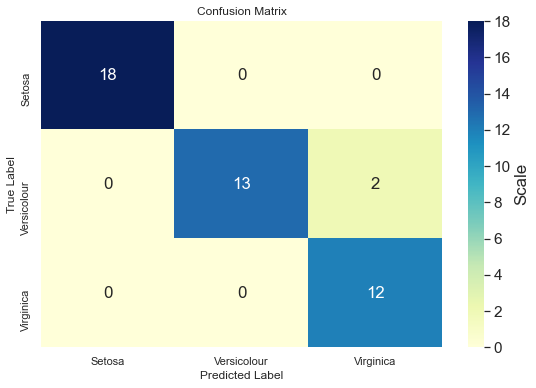

In [15]:
def plot_confusion_matrix(data, labels):
    
    sns.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
 
    plt.title("Confusion Matrix")
 
    sns.set(font_scale=1.4)
    ax = sns.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="True Label", xlabel="Predicted Label")
 
    plt.show()
 
 
# define labels
labels = ["Setosa","Versicolour","Virginica"]
 
# create confusion matrix
plot_confusion_matrix(cm, labels)

[Text(186.0, 757.1571428571428, 'petal_width <= 0.7\nentropy = 1.579\nsamples = 102\nvalue = [30, 35, 37]'),
 Text(124.0, 640.6714285714286, 'entropy = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(248.0, 640.6714285714286, 'petal_length <= 4.75\nentropy = 0.999\nsamples = 72\nvalue = [0, 35, 37]'),
 Text(124.0, 524.1857142857143, 'petal_width <= 1.65\nentropy = 0.196\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(62.0, 407.7, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(186.0, 407.7, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(372.0, 524.1857142857143, 'petal_width <= 1.75\nentropy = 0.391\nsamples = 39\nvalue = [0, 3, 36]'),
 Text(310.0, 407.7, 'sepal_width <= 2.65\nentropy = 0.985\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(248.0, 291.21428571428567, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(372.0, 291.21428571428567, 'petal_length <= 5.05\nentropy = 0.971\nsamples = 5\nvalue = [0, 3, 2]'),
 Text(310.0, 174.7285714285714, 'entropy = 0.0\nsamples = 2\

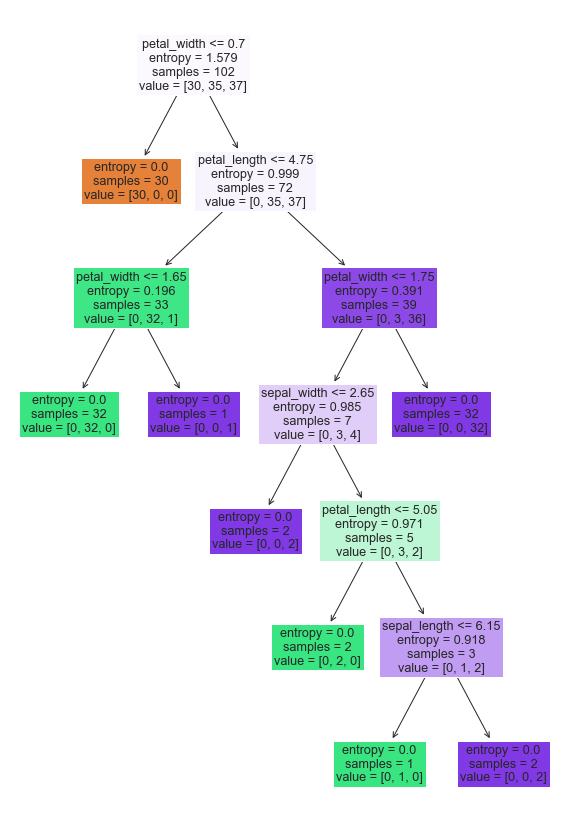

In [16]:
from sklearn import tree
plt.figure(figsize=(10,15))
tree.plot_tree(dtree,filled=True,feature_names=df.columns[0:4])
